In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
import time
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_excel("Hotel_Feedback_Table_Structure.xlsx", "Feedback", parse_date=['Date'], index_col='Date')
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName
Date,,,,,,,
2019-07-06,1,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9031236445,"We booked a 3 night stay to play some tennis,...",1,5
2019-07-12,2,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9031236446,Amazing place. Everyone was extremely warm and...,2,5
2019-08-15,3,ABHASH SAXENA,abhashsaxena@gmail.com,9031236447,"Even though we were having problems, i.e. Feat...",1,5
2019-08-22,4,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9031236448,Currently in bed writing this for the past hr ...,3,2
2019-07-20,5,NIHARIKA PAWAR,niharikapawar@gmail.com,9031236449,I live in Md and the Aloft is my Home away fro...,2,5


In [3]:
#create a label

df["label"] = df["RatingName"].apply(lambda x: 1 if x < 2.5 else 0)
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label
Date,,,,,,,,
2019-07-06,1,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9031236445,"We booked a 3 night stay to play some tennis,...",1,5,0
2019-07-12,2,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9031236446,Amazing place. Everyone was extremely warm and...,2,5,0
2019-08-15,3,ABHASH SAXENA,abhashsaxena@gmail.com,9031236447,"Even though we were having problems, i.e. Feat...",1,5,0
2019-08-22,4,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9031236448,Currently in bed writing this for the past hr ...,3,2,1
2019-07-20,5,NIHARIKA PAWAR,niharikapawar@gmail.com,9031236449,I live in Md and the Aloft is my Home away fro...,2,5,0


In [4]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


# clean text data
df["Comment_clean"] = df["Comment"].apply(lambda x: clean_text(x))

In [5]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Comment"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,neu,pos,compound
Date,,,,,,,,,,,,,
2019-07-06,1,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9031236445,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,0.718,0.282,0.9748
2019-07-12,2,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9031236446,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,0.654,0.346,0.9650
2019-08-15,3,ABHASH SAXENA,abhashsaxena@gmail.com,9031236447,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,0.676,0.228,0.5719
2019-08-22,4,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9031236448,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,1.000,0.000,0.0000
2019-07-20,5,NIHARIKA PAWAR,niharikapawar@gmail.com,9031236449,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,0.838,0.162,0.8713


In [6]:
# add number of characters column
df["nb_chars"] = df["Comment"].apply(lambda x: len(x))
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,neu,pos,compound,nb_chars
Date,,,,,,,,,,,,,,
2019-07-06,1,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9031236445,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,0.718,0.282,0.9748,453
2019-07-12,2,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9031236446,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,0.654,0.346,0.9650,283
2019-08-15,3,ABHASH SAXENA,abhashsaxena@gmail.com,9031236447,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,0.676,0.228,0.5719,146
2019-08-22,4,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9031236448,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,1.000,0.000,0.0000,198
2019-07-20,5,NIHARIKA PAWAR,niharikapawar@gmail.com,9031236449,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,0.838,0.162,0.8713,307


In [7]:
# add number of words column
df["nb_words"] = df["Comment"].apply(lambda x: len(x.split(" ")))
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,neu,pos,compound,nb_chars,nb_words
Date,,,,,,,,,,,,,,,
2019-07-06,1,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9031236445,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,0.718,0.282,0.9748,453,79
2019-07-12,2,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9031236446,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,0.654,0.346,0.9650,283,52
2019-08-15,3,ABHASH SAXENA,abhashsaxena@gmail.com,9031236447,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,0.676,0.228,0.5719,146,22
2019-08-22,4,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9031236448,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,1.000,0.000,0.0000,198,37
2019-07-20,5,NIHARIKA PAWAR,niharikapawar@gmail.com,9031236449,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,0.838,0.162,0.8713,307,58


In [8]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Comment_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["Comment_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)
df.head()

C:\Users\Abhilasha\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
Date,,,,,,,,,,,,,,,,,,,,
2019-07-06,1,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9031236445,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,0.718,0.282,0.9748,453,79,-0.036799,0.035250,-0.061832,-0.202049,0.093613
2019-07-12,2,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9031236446,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,0.654,0.346,0.9650,283,52,0.090730,0.006419,-0.014989,-0.093940,0.022653
2019-08-15,3,ABHASH SAXENA,abhashsaxena@gmail.com,9031236447,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,0.676,0.228,0.5719,146,22,0.089990,-0.032429,-0.095092,-0.031060,-0.018531
2019-08-22,4,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9031236448,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,1.000,0.000,0.0000,198,37,0.106594,-0.000258,-0.117758,0.011183,-0.055000
2019-07-20,5,NIHARIKA PAWAR,niharikapawar@gmail.com,9031236449,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,0.838,0.162,0.8713,307,58,-0.007686,-0.075472,-0.128664,-0.140826,0.032020


In [9]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["Comment_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,...,word_view,word_wait,word_walk,word_wall,word_water,word_way,word_well,word_window,word_work,word_would
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-06,1,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9031236445,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.209818,0.0,0.0,0.0
2019-07-12,2,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9031236446,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,...,0.0,0.588811,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2019-08-15,3,ABHASH SAXENA,abhashsaxena@gmail.com,9031236447,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2019-08-22,4,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9031236448,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2019-07-20,5,NIHARIKA PAWAR,niharikapawar@gmail.com,9031236449,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [10]:
df.shape

(499, 188)

In [11]:

df["label"].value_counts(normalize = True)

0    0.61523
1    0.38477
Name: label, dtype: float64

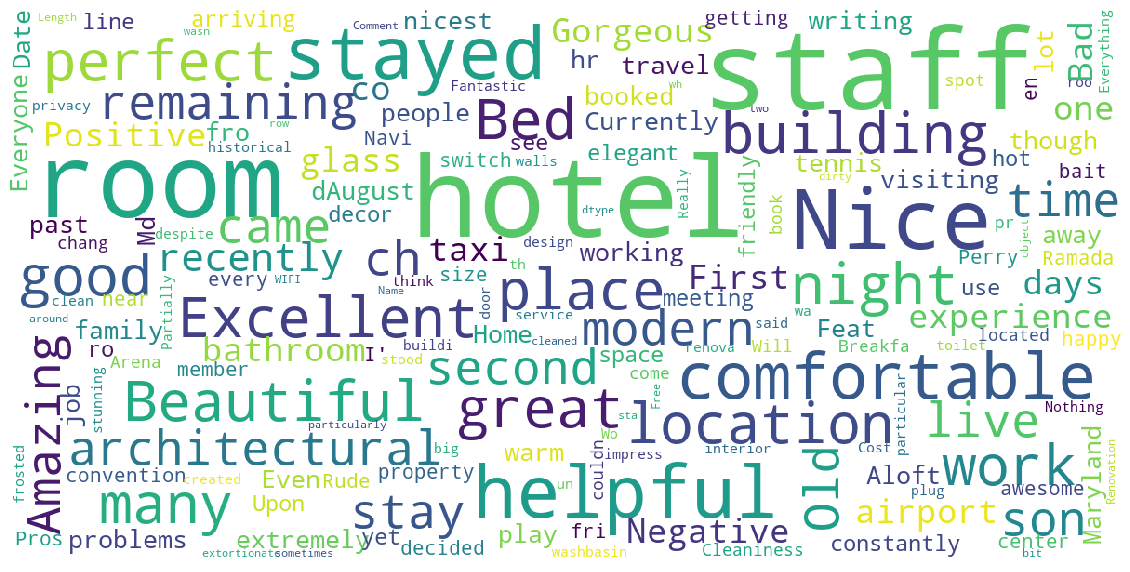

In [12]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(df, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(df))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Comment"])

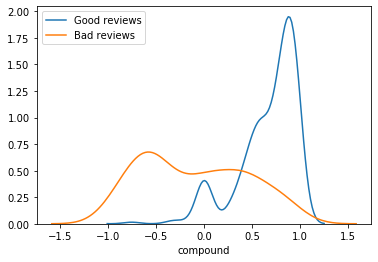

In [13]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df[df['label'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [14]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 2.5].sort_values("pos", ascending = False)[["Comment", "pos"]].head()

,Comment,pos
Date,,
2019-08-12,Great room great staff great food,0.804
2019-08-15,Great location lovely room,0.798
2019-08-13,I loved everything,0.796
2019-08-26,beautiful interior,0.796
2019-08-28,Excellent Breakfasts,0.787


In [15]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >=2.5].sort_values("neg", ascending = False)[["Comment", "neg"]].head()

,Comment,neg
Date,,
2019-07-07,We didn t have a bad experience,0.467
2019-07-28,Water pressure in my shower was no existent F...,0.441
2019-08-11,I was really disappointed with the TV service....,0.371
2019-08-22,The hotel looked abit tired lots of scratches...,0.336
2019-08-03,not cleaned well lady pushing to pay during m...,0.311


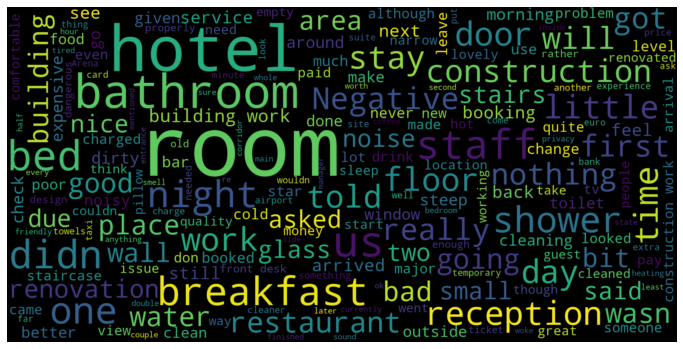

In [16]:
neg_reviews = df[df.label == 1]
neg_string = []
for t in neg_reviews.Comment:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

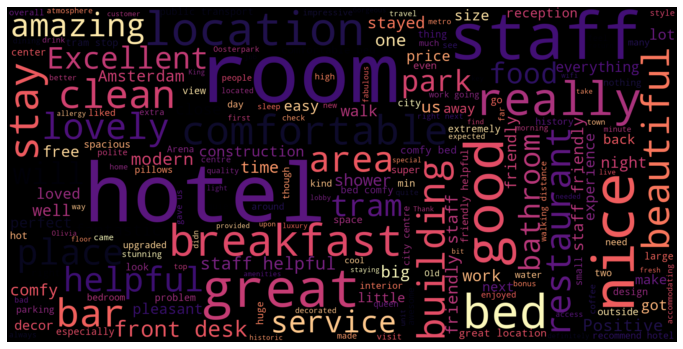

In [17]:
pos_reviews = df[df.label == 0]
pos_string = []
for t in pos_reviews.Comment:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
#top unigrams before removing stop words
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

the 1090
and 524
was 451
to 363
room 267
in 246
hotel 241
of 224
we 219
is 211
very 199
it 195
staff 164
were 154
for 149
not 135
but 125
at 116
with 116
on 114


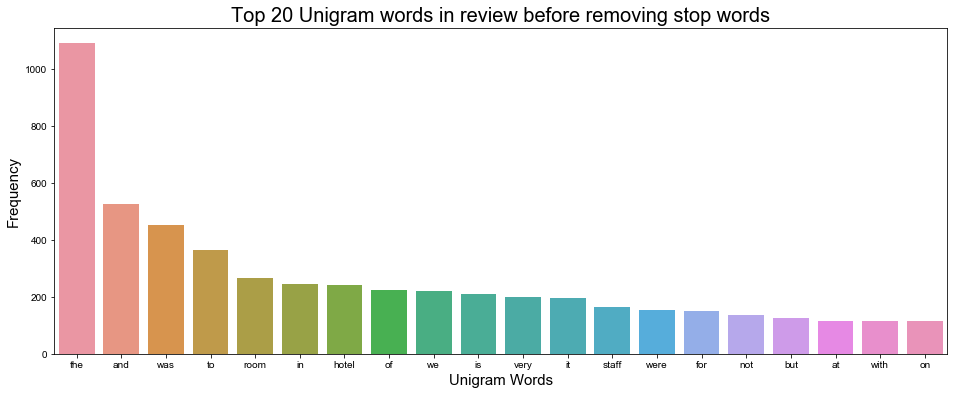

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
fig = sns.barplot(x=df1["Comment"], y=df1["count"])
sns.set(font_scale=1.0)
plt.xlabel("Unigram Words", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top 20 Unigram words in review before removing stop words", fontsize=20) 
plt.show(fig)

In [20]:
#Top unigrams after removing stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

room 267
hotel 241
staff 164
bed 90
nice 83
great 76
good 75
rooms 73
breakfast 66
really 61
location 59
building 57
bathroom 56
stay 54
helpful 54
friendly 54
comfortable 49
work 45
clean 40
didn 40


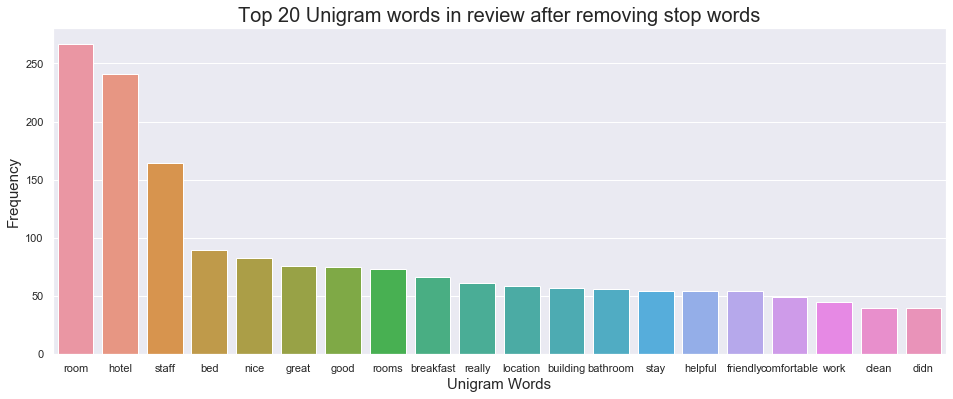

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
fig = sns.barplot(x=df2["Comment"], y=df2["count"])
sns.set(font_scale=1.0)
plt.xlabel("Unigram Words", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top 20 Unigram words in review after removing stop words", fontsize=20) 
plt.show(fig)

In [22]:
#Top bigrams before removing stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

the hotel 117
in the 94
the room 86
of the 84
and the 66
to the 65
room was 53
it was 52
the staff 50
hotel is 41
the bed 39
was very 38
at the 37
from the 36
staff were 36
we were 35
our room 35
on the 34
bed was 34
there was 34


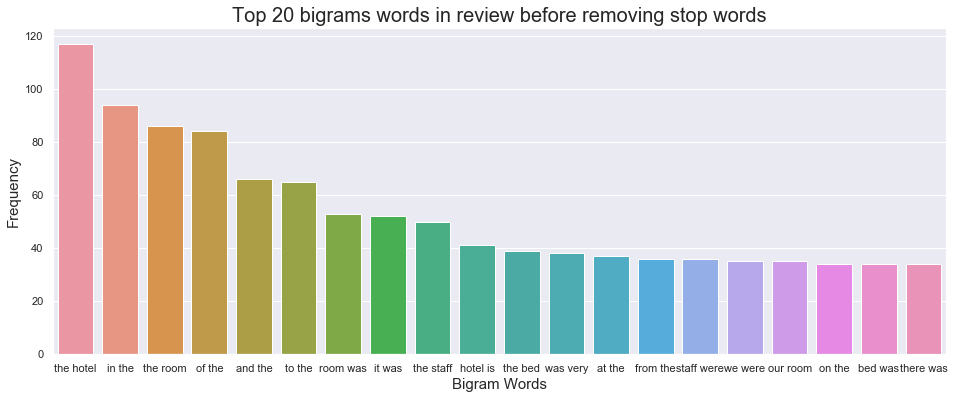

In [23]:
import matplotlib.pyplot as mplt
plt.figure(figsize=(16, 6))
fig = sns.barplot(x=df3["Comment"], y=df3["count"])
sns.set(font_scale=1.0)
plt.xlabel("Bigram Words", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top 20 bigrams words in review before removing stop words", fontsize=20) 
plt.show(fig)


In [24]:
#Top bigrams after removing stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Comment'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Comment' , 'count'])

staff helpful 17
staff friendly 16
building work 16
friendly staff 15
hotel great 13
great location 10
recommend hotel 9
friendly helpful 9
staff great 8
public transport 8
bar staff 8
good location 8
comfortable bed 8
work going 8
bed comfy 8
hotel arena 8
helpful friendly 7
bed comfortable 7
city centre 7
room service 6


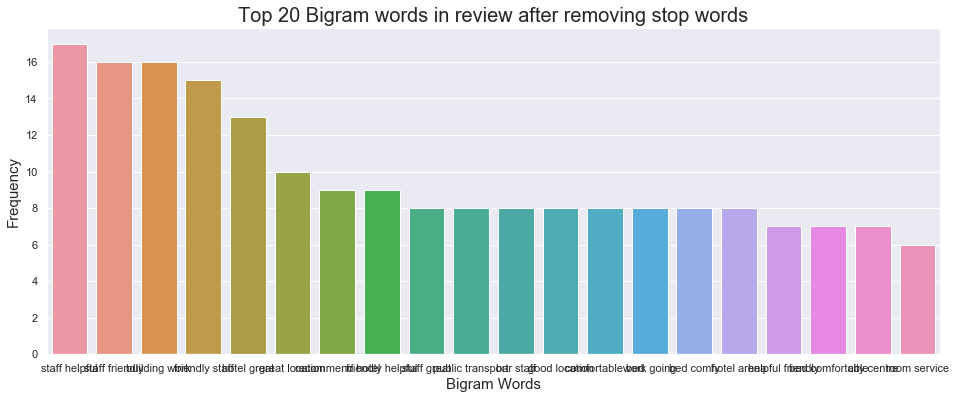

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
fig = sns.barplot(x=df4["Comment"], y=df4["count"])
sns.set(font_scale=0.5)
plt.xlabel("Bigram Words", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top 20 Bigram words in review after removing stop words", fontsize=20) 
plt.show(fig)

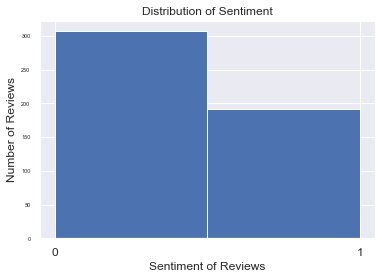

In [26]:
import matplotlib.pyplot as plt
plt.hist(df['label'], bins = 2, align= 'mid')
plt.xticks(range(2), [0,1],fontsize=12)
plt.xlabel('Sentiment of Reviews',fontsize=12)
plt.ylabel('Number of Reviews',fontsize=12)
plt.title('Distribution of Sentiment',fontsize=12)
plt.show()

In [27]:
df.label.value_counts()

0    307
1    192
Name: label, dtype: int64

In [28]:
#monthly average reviews
print(df['2019-07-01': '2019-07-30'].RatingName.mean())#july month 
print(df['2019-08-01': '2019-08-30'].RatingName.mean())#aug month
print(df['2019-09-01': '2019-09-30'].RatingName.mean())#sep month

3.0357142857142856
3.198443579766537
3.6


In [29]:
print(df['2019-07-01': '2019-09-30'].RatingName.mean())#last quarterly month

3.1222444889779557


In [30]:
df.RatingName.resample('D').mean()

Date
2019-07-01    3.000000
2019-07-02    2.800000
2019-07-03    2.166667
2019-07-04    3.750000
2019-07-05    3.125000
2019-07-06    2.833333
2019-07-07    2.111111
2019-07-08    2.500000
2019-07-09    3.250000
2019-07-10    2.666667
2019-07-11    3.250000
2019-07-12    3.222222
2019-07-13    3.125000
2019-07-14    2.500000
2019-07-15    2.600000
2019-07-16    3.333333
2019-07-17    3.200000
2019-07-18    4.166667
2019-07-19    3.333333
2019-07-20    2.571429
2019-07-21    3.090909
2019-07-22    3.100000
2019-07-23    3.500000
2019-07-24    3.400000
2019-07-25    3.166667
2019-07-26    3.400000
2019-07-27    3.333333
2019-07-28    3.000000
2019-07-29    3.500000
2019-07-30    2.769231
                ...   
2019-08-03    3.714286
2019-08-04    2.714286
2019-08-05    4.250000
2019-08-06    2.666667
2019-08-07    3.222222
2019-08-08    3.200000
2019-08-09    4.400000
2019-08-10    2.583333
2019-08-11    3.571429
2019-08-12    3.538462
2019-08-13    2.230769
2019-08-14    3.222222
2019-0

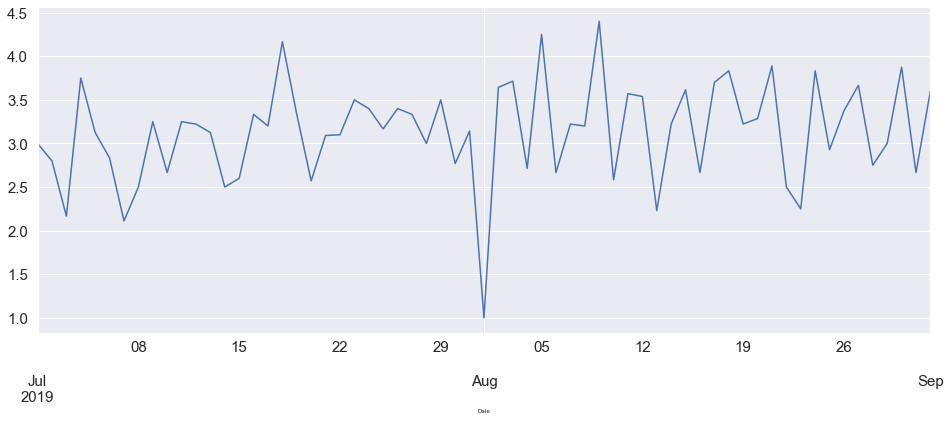

In [31]:
plt.figure(figsize=(16,6))
df.RatingName.resample('D').mean().plot(fontsize=15)
plt.rcParams.update({'font.size':50})

In [39]:
from PIL import Image
Review_mask = np.array(Image.open("neg.png"))
Review_mask.shape

(300, 286, 4)

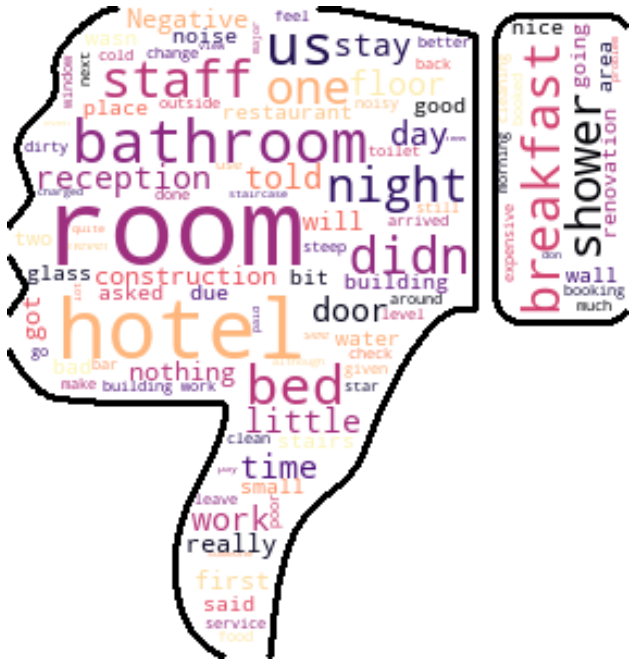

In [45]:
# Create a word cloud image
from wordcloud import WordCloud, ImageColorGenerator
wc_2 = WordCloud(background_color="white", mask = Review_mask, width = 1600, height = 900,max_font_size=50, max_words=100,colormap='magma',contour_width=2).generate(neg_string)

# Generating colors from image
image_colors = ImageColorGenerator(Review_mask)

# show
plt.figure(figsize=[20,12]) # height, width in inches
plt.imshow(wc_2, interpolation ='bilinear') # Using the color function here
plt.axis("off")
plt.show()

In [34]:
Pos_review_mask = np.array(Image.open("thumbsup.png"))
Pos_review_mask.shape

(597, 570, 4)

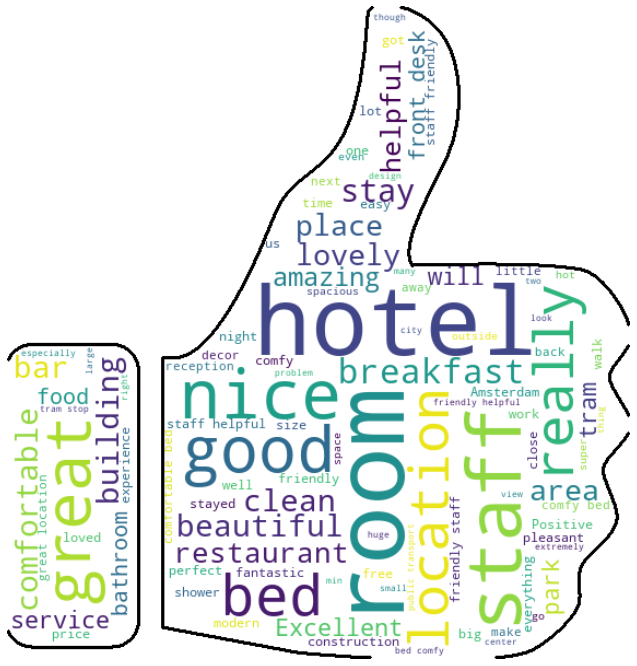

In [46]:
# Create a word cloud image
from wordcloud import WordCloud, ImageColorGenerator
wc_2 = WordCloud(background_color="white", mask = Pos_review_mask, width = 1600, height = 900,max_font_size=90, max_words=100, contour_width=3).generate(pos_string)

# Generating colors from image
image_colors = ImageColorGenerator(Pos_review_mask)

# show
plt.figure(figsize=[16,12]) # height, width in inches
plt.imshow(wc_2, interpolation ='bilinear') # Using the color function here
plt.axis("off")
plt.show()